Q: Can MADGICS work on extremely non-Gaussian data, like the two moons dataset?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [3]:
x, y = make_moons(n_samples = 10000, noise = 0.1)

In [4]:
x[y == 1].shape

(5000, 2)

In [5]:
# We are taking each "moon" to be a component
x1 = x[y == 1].T
x2 = x[y == 0].T

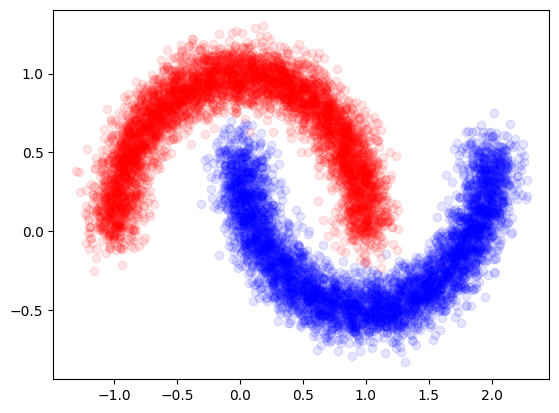

In [6]:
plt.plot(*x1, 'bo', alpha = 0.1)
plt.plot(*x2, 'ro', alpha = 0.1)

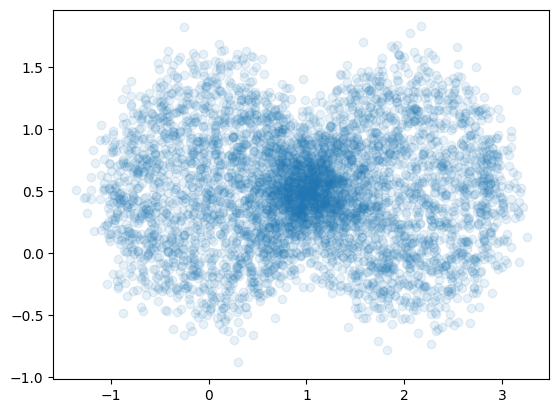

In [7]:
total_data = (x1 + x2)
plt.plot(*total_data, 'o', alpha = 0.1)

In [8]:
cov1 = (np.matmul(x1,x1.T))/x1.shape[1]
cov2 = (np.matmul(x2,x2.T))/x2.shape[1]

In [9]:
cov1, cov2, cov1+cov2

(array([[ 1.51076685, -0.1341239 ],
        [-0.1341239 ,  0.12384811]]),
 array([[5.11491383e-01, 1.05612649e-04],
        [1.05612649e-04, 5.09467582e-01]]),
 array([[ 2.02225823, -0.13401829],
        [-0.13401829,  0.63331569]]))

In [10]:
ctotinv = np.linalg.inv(cov1 + cov2)

In [11]:
recovered_x1 = np.matmul(np.matmul(cov1, ctotinv), total_data)
recovered_x2 = np.matmul(np.matmul(cov2, ctotinv), total_data)

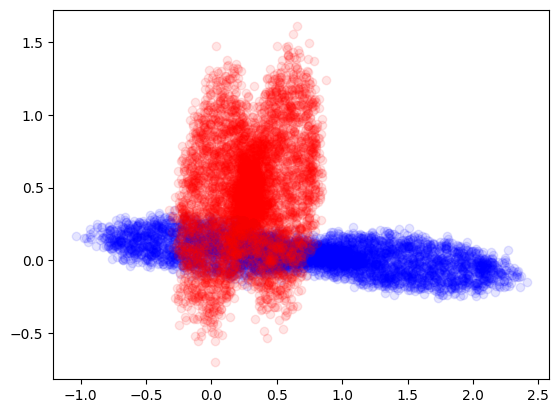

In [12]:
plt.plot(*recovered_x1, 'bo', alpha = 0.1)
plt.plot(*recovered_x2, 'ro', alpha = 0.1)

Text(0.5, 1.0, 'Recovered components')

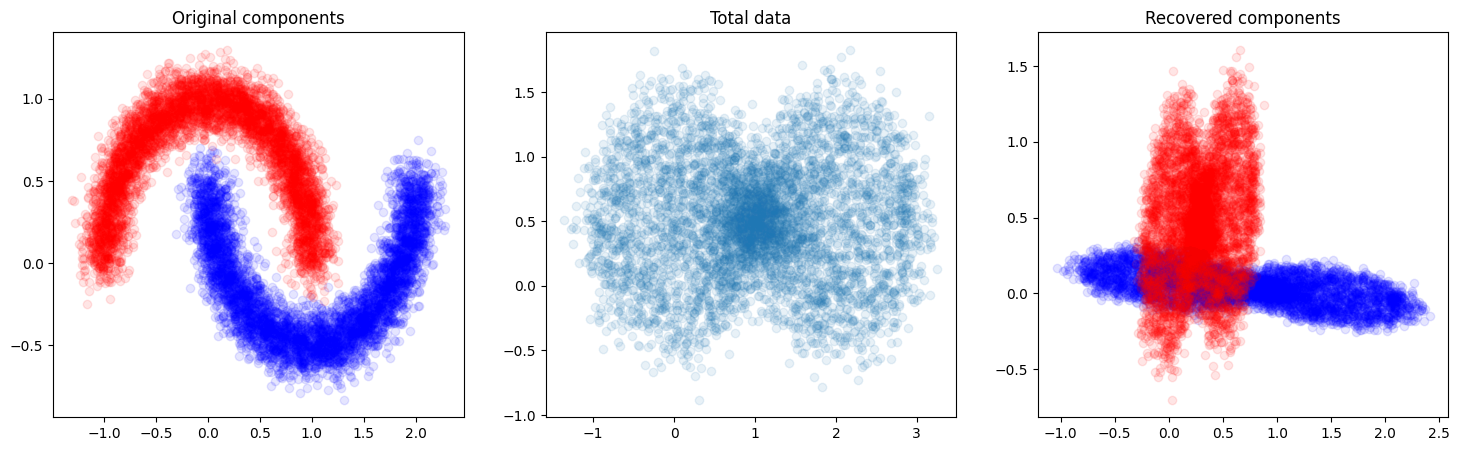

In [14]:
fig, ax = plt.subplots(1,3, figsize=(18,5))
ax[0].plot(*x1, 'bo', alpha = 0.1)
ax[0].plot(*x2, 'ro', alpha = 0.1)
ax[1].plot(*total_data, 'o', alpha = 0.1)
ax[2].plot(*recovered_x1, 'bo', alpha = 0.1)
ax[2].plot(*recovered_x2, 'ro', alpha = 0.1)
ax[0].set_title("Original components")
ax[1].set_title("Total data")
ax[2].set_title("Recovered components")

A: Nope!